# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('07-x_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('07-x_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('07-y_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('07-y_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [4]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [5]:
overs = RandomOverSampler()

In [6]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [7]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,1
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **NORMALIZACION DE CARACTERISTICAS**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [9]:
x_train_std

array([[-0.3945937 , -0.79268317,  0.8435669 , ...,  0.22415425,
         0.50113363,  0.38756779],
       [-0.87395244, -1.17375408,  0.59742692, ...,  0.08669917,
         0.37434695, -1.45777969],
       [-0.88113419, -0.6237225 ,  0.55663606, ..., -0.26359418,
         0.31109085, -1.66794054],
       ...,
       [-0.56137754, -0.39621341,  0.54553473, ...,  1.04909719,
        -1.01806144, -0.00800529],
       [-0.70565862, -0.93401649,  0.78664118, ..., -0.41880451,
         0.41206351, -0.80173898],
       [-0.66087281, -1.19917812,  1.2672511 , ..., -0.2490079 ,
         0.67986753,  0.49769546]])

In [10]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,1
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **MODELO DE MARCHINE LEARNING**

In [11]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [12]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
118/118 [==============================] - 1s 3ms/step - loss: 0.9734 - accuracy: 0.5778
Epoch 2/800
118/118 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.6476
Epoch 3/800
118/118 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.6847
Epoch 4/800
118/118 [==============================] - 0s 3ms/step - loss: 0.7296 - accuracy: 0.6996
Epoch 5/800
118/118 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.7221
Epoch 6/800
118/118 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.7351
Epoch 7/800
118/118 [==============================] - 0s 3ms/step - loss: 0.6118 - accuracy: 0.7503
Epoch 8/800
118/118 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.7633
Epoch 9/800
118/118 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7718
Epoch 10/800
118/118 [==============================] - 0s 3ms/step - loss: 0.5256 - accura

array([2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 3, 2, 1, 3,
       1, 2, 3, 2, 0, 2, 1, 0, 2, 3, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 3,
       2, 2, 0, 2, 3, 0, 3, 2, 1, 0, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 0, 2,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 2, 2, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 2, 2, 2, 0, 2, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2,
       0, 2, 2, 3, 3, 1, 1, 0, 3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 3, 1, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 3, 0, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 3, 1, 2, 2, 3, 2, 1, 2,
       3, 2, 2, 2, 0, 1, 0, 3, 3, 2, 2, 0, 3, 2, 3, 1, 1, 3, 2, 3, 2, 2,
       1, 1, 0, 2, 2, 3, 2, 2, 2, 1, 0, 2, 3, 2, 2, 2, 0, 1, 3, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 3, 2, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 3, 2, 3,
       1, 1, 3, 1, 3, 3, 0, 2, 2, 2, 3, 2, 0, 3, 2,

# **EVALUACION**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        83
           1       0.56      0.50      0.53        96
           2       0.75      0.76      0.75       241
           3       0.75      0.74      0.74       159

    accuracy                           0.71       579
   macro avg       0.68      0.69      0.68       579
weighted avg       0.71      0.71      0.71       579



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        83
           1       0.56      0.50      0.53        96
           2       0.75      0.76      0.75       241
           3       0.75      0.74      0.74       159

    accuracy                           0.71       579
   macro avg       0.68      0.69      0.68       579
weighted avg       0.71      0.71      0.71       579

Matriz de confusión, sin normalización
[[ 62   6  15   0]
 [ 16  48  21  11]
 [ 11  19 183  28]
 [  3  13  26 117]]


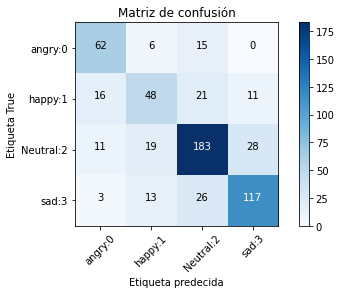

In [15]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')